In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns 

# **Wine Rebiews**
----

### 对数据进行大致浏览，观看前5行数据

In [3]:
WR1 = pd.read_csv('Wine Reviews/winemag-data-130k-v2.csv')
WR2 = pd.read_csv('Wine Reviews/winemag-data-130k-v2.csv')
WR=pd.concat([WR1,WR2],ignore_index=True,sort=False)
WR=WR.drop(labels='Unnamed: 0',axis=1)
WR.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 数据去重复

In [4]:
WR.duplicated().value_counts()

True     139954
False    119988
dtype: int64

In [5]:
wine=WR.drop_duplicates()
#进一步检查，发现存在很多字段都重复的数据，认为是重复数据并将其清除
dupilicated_index=list(wine[wine[['country','description','designation','province','points','price']].duplicated()].index)
wine=wine.drop(labels=dupilicated_index,axis=0)
wine.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119978,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
119979,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
119980,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
119981,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### 查看哪些属性存在缺失值

In [6]:
wine.isnull().sum()

country                     59
description                  0
designation              34544
points                       0
price                     8393
province                    59
region_1                 19560
region_2                 73215
taster_name              24916
taster_twitter_handle    29445
title                        0
variety                      1
winery                       0
dtype: int64

## 一、数据可视化和摘要
### 1.1 数据摘要
#### 1.1.1 数值数据统计描述：5数概括 主要包括均值，标准差，最小数，四分位数，最大值 和缺失值个数
##### 5值概括

In [7]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
points,119983.0,88.442213,3.092916,80.0,86.0,88.0,91.0,100.0
price,111590.0,35.621086,42.104210,4.0,17.0,25.0,42.0,3300.0


##### 缺失值个数

In [8]:
wine[['points','price']].isnull().sum()

points       0
price     8393
dtype: int64

### 1.1.2 标称属性统计描述：取值频数，缺失值

In [9]:
for i in WR.columns:
    if i not in ['points','price','description','title']:
        print('属性: {} 的频数'.format(i))
        print(WR[i].value_counts().head())
        


属性: country 的频数
US          109008
France       44186
Italy        39080
Spain        13290
Portugal     11382
Name: country, dtype: int64
属性: designation 的频数
Reserve         4018
Estate          2644
Reserva         2518
Riserva         1396
Estate Grown    1242
Name: designation, dtype: int64
属性: province 的频数
California    72494
Washington    17278
Bordeaux      11882
Tuscany       11794
Oregon        10746
Name: province, dtype: int64
属性: region_1 的频数
Napa Valley             8960
Columbia Valley (WA)    8248
Russian River Valley    6182
California              5258
Paso Robles             4700
Name: region_1, dtype: int64
属性: region_2 的频数
Central Coast        22130
Sonoma               18056
Columbia Valley      16206
Napa                 13628
Willamette Valley     6846
Name: region_2, dtype: int64
属性: taster_name 的频数
Roger Voss           51028
Michael Schachner    30268
Kerin O’Keefe        21552
Virginie Boone       19074
Paul Gregutt         19064
Name: taster_name, dtype: int64

### 1.2 数据可视化
1. 绘制价格度数之间的散点图，根据散点图的分布，可以明显看出文件明显存在离群点

Text(0.5, 1.0, 'price-points scatter')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


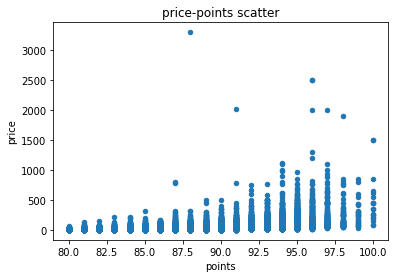

In [10]:
wine.plot.scatter(x='points',y='price')
plt.title('price-points scatter')

2. 绘制价格和度数的盒图，通过盒图可以判断出超过分位数的点，从而认为是离群点

count    119983.000000
mean         88.442213
std           3.092916
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

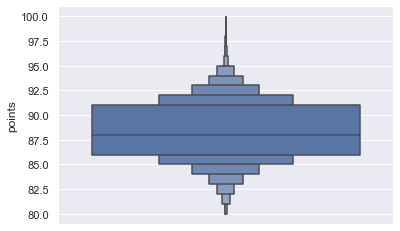

In [11]:
sns.set()
sns.boxenplot(y='points',data=wine)
wine['points'].describe()

count    111590.000000
mean         35.621086
std          42.104210
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

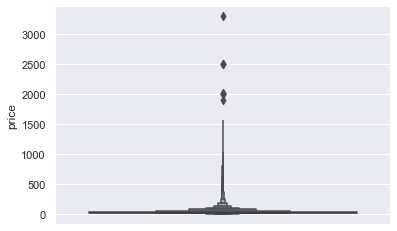

In [12]:
sns.set()
sns.boxenplot(y='price',data=wine)
wine['price'].describe()

3. 绘制标称属性的统计柱状图 通过柱状图看可以看到整体数据分布情况

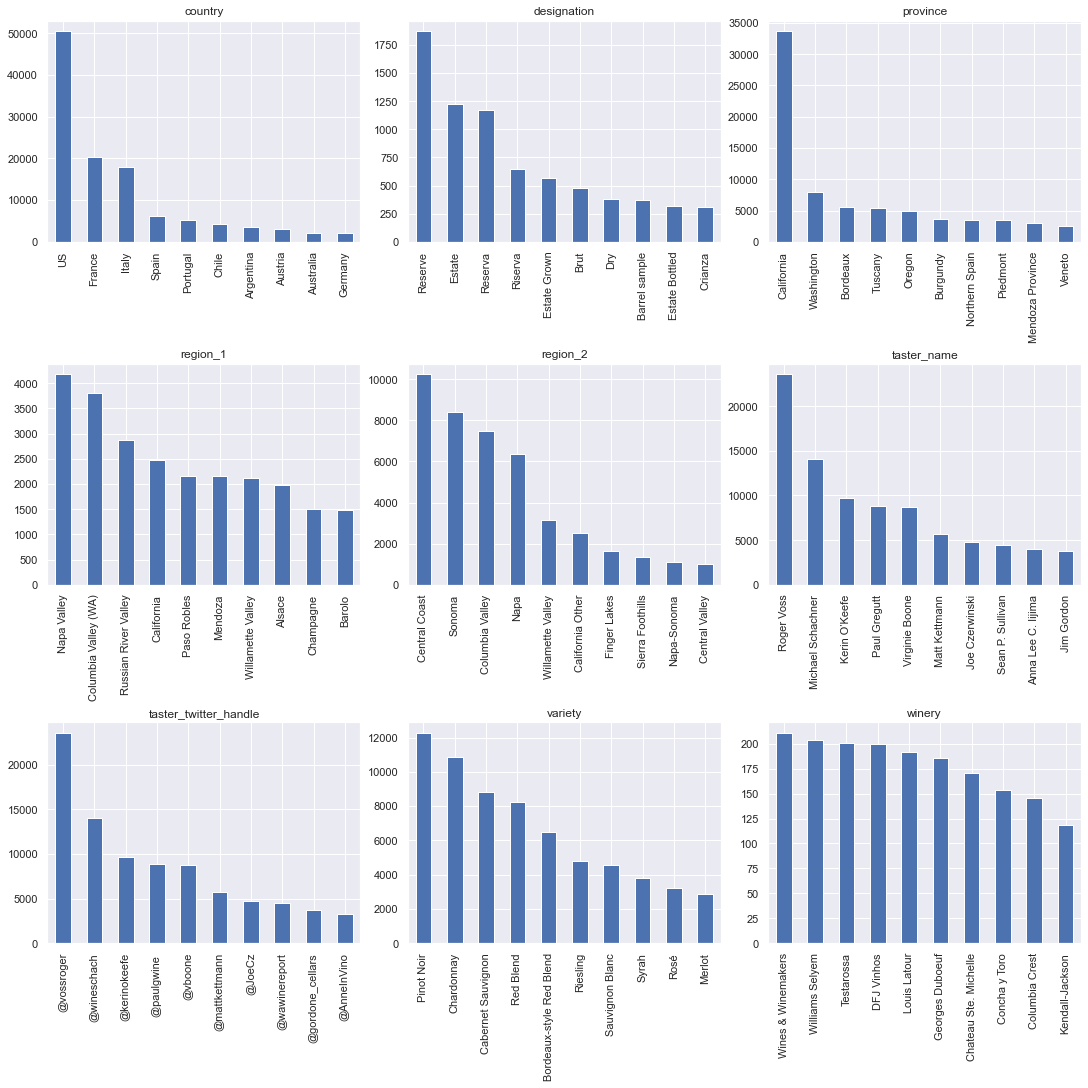

In [13]:
f,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15),constrained_layout=True)

name = ['country', 'designation', 'province', 
        'region_1', 'region_2', 'taster_name',
        'taster_twitter_handle', 'variety', 'winery']
name_idx = 0
for i in range(3):
    for j in range(3):
        tmp = wine[name[name_idx]].value_counts()[:10]
        tmp.plot(kind='bar',title=name[name_idx],ax = ax[i][j])
        name_idx += 1  


# 2、数据缺失值补充
## 2.1 缺失值剔除

In [36]:
wine_ = wine[(wine['price'].notnull())]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,119924,119983,85439,119983.000000,111590.000000,119924,100423,46768,95067,90538,119983,119982,119983
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118835,707,16757
top,US,"Aromas of citrus, melon and orange blossom sta...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50456,2,1871,NaN,NaN,33655,4174,10232,23558,23558,9,12278,211
mean,NaN,NaN,NaN,88.442213,35.621086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092916,42.104210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(wine[wine['province'].isnull()].describe().T)
print(wine[~wine['province'].isnull()].describe().T)

        count       mean       std   min   25%   50%   75%   max
points   59.0  88.627119  2.258305  82.0  87.5  89.0  90.0  92.0
price    55.0  24.745455  9.369411   6.0  18.5  25.0  30.0  50.0
           count       mean        std   min   25%   50%   75%     max
points  119924.0  88.442122   3.093275  80.0  86.0  88.0  91.0   100.0
price   111535.0  35.626449  42.113392   4.0  17.0  25.0  42.0  3300.0
